In [11]:
#Part-2: Code
#- implement AR(p) regression from scratch (i.e. no statsmodels module)
#- 1) given An input vector Y and AR order p formulate the following matrices
#2) Compute the optimal parameters using OLS ̂ β = (XTX)
#- 3) Compute the optimal paramerters numerically by defining a loss function L(w) that compute MSE for a parameterization of the model
#- 4) mimizie the loss function using scipy minimize
#- 5) compare numerical and OLS predictions with statsmodels predictions for the parameters

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [13]:
# GENERATE DATA
N=50
x=np.linspace(0,5,N).reshape(N,1)
y=5.32*x+3.4+np.random.uniform(0.0,2,N).reshape(N,1)
NFIT=2#NUMBER OF FITTING PARAMETER
#SPLIT DATA
f_train=0.8;f_val=0.2;
stop=int(0.8*N)
rand_indices=np.random.permutation(y.shape[0])
CUT1=int(f_train*x.shape[0]);
train_idx,val_idx=rand_indices[:CUT1],rand_indices[CUT1:]
print('------PARTITION INFO---------')
print("train_idx shape:",train_idx.shape)
print("val_idx shape:",val_idx.shape)


------PARTITION INFO---------
train_idx shape: (40,)
val_idx shape: (10,)


In [14]:
#DEFINE ARRAYS
X=x[train_idx];Y=y[train_idx]
x2=x[val_idx];y2=y[val_idx]
#ADD ONES TO X ARRAY FOR BIAS TERM
n=X.shape[0]
ones=np.ones((n,1))
X=np.concatenate((ones,X),axis=1)
print(X.shape,Y.shape)


(40, 2) (40, 1)


In [15]:
#ANALYTIC SOLUTION
tmp=np.matmul(np.transpose(X),X)
tmp=np.matmul(np.linalg.inv(tmp),np.transpose(X))
param=np.matmul(tmp,Y)
print("ANALYTICAL SOLUTION:")
print(param)


ANALYTICAL SOLUTION:
[[4.36269969]
 [5.31742018]]


In [17]:
#MODEL
def M(w):
    return np.matmul(X,w)




In [19]:
#LOSS
def loss(w):
    ypred=M(w)
    ypred=ypred.reshape(ypred.shape[0],1)
    #print(ypred.shape); exit()
    return np.mean((ypred-Y)**2.0)

In [22]:
#INITIAL GUESS
wo=np.random.uniform(0.0,5,NFIT).reshape(NFIT,1)
print(wo)


[[4.46117   ]
 [4.96317832]]


In [23]:
#OPTIMIZE
res=minimize(loss,wo,method='BFGS',tol=1e-5)
popt=res.x
print("NUMERICAL SOLUTION:",popt)


NUMERICAL SOLUTION: [4.36269969 5.31742017]


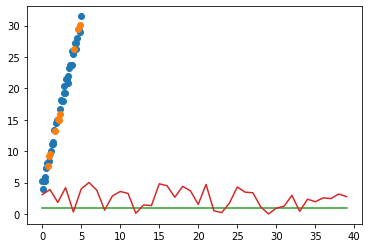

In [24]:
#PLOT
plt.plot(X[:,1],Y,'o')
plt.plot(x2,y2,'o')
plt.plot(X)
